In [1]:
##kaggle animal shelter outcome
###explore the data

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the test data
animals = pd.read_csv('train.csv')

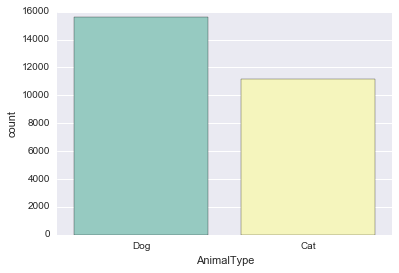

In [4]:
#see how many cats and dogs in shelter for training set (it's in austin tx)
#A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.
#The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.
#AnimalType is a column name, only two types (cats and dawgs)
#palette = 3 is just for the color 
sns.countplot(animals.AnimalType, palette = 'Set3')


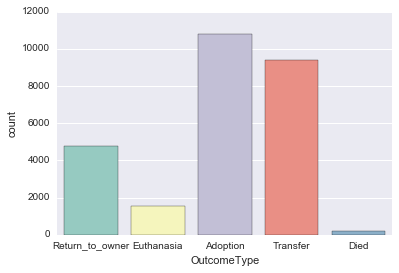

In [5]:
#do the same thing with the OutcomeType column, 4 different outcomes
sns.countplot(animals.OutcomeType, palette = 'Set3')

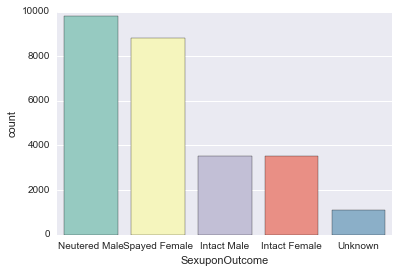

In [6]:
#do the same thing with the spay/neuter column
sns.countplot(animals.SexuponOutcome, palette = 'Set3')

In [15]:
#def new functions to get new parameters from column
#you have to make x a string for .find to work
def get_sex(x):
    x=str(x)
    if x.find('Male') >= 0: return 'male'
    if x.find('Female') >= 0: return 'female'
    return 'unknown'
def get_neutered(x):
    x=str(x)
    if x.find('Spayed') >= 0: return 'neutered'
    if x.find('Neutered') >= 0: return 'neutered'
    if x.find('Intact') >= 0: return 'intact'
    return 'unknown'

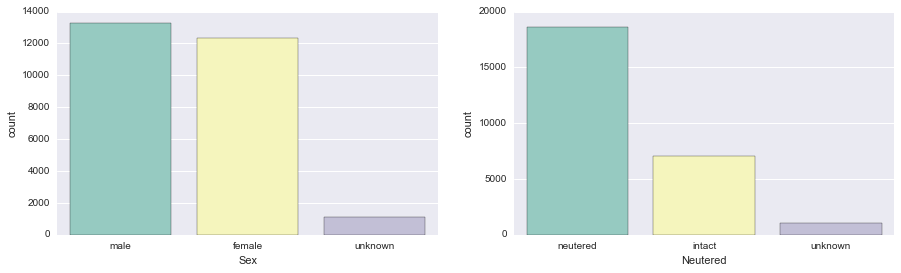

In [16]:
#with this column we can divide futher into spay/neuter vs intact for males and females
animals['Sex']=animals.SexuponOutcome.apply(get_sex)
animals['Neutered']= animals.SexuponOutcome.apply(get_neutered)
f, (ax1,ax2) = plt.subplots(1,2, figsize = (15,4))
sns.countplot(animals.Sex, palette = 'Set3', ax=ax1)
sns.countplot(animals.Neutered, palette = 'Set3', ax=ax2)

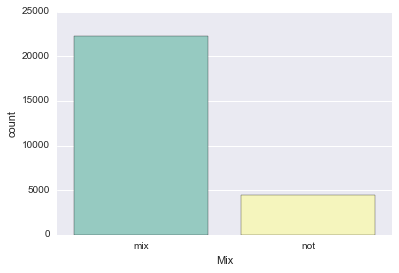

In [17]:
#what impact does breed have
#looking at csv file, if 'Mix' in the desc then assume not purebred. ex.American Pit Bull Terrier Mix
def get_mix(x):
    x = str(x)
    if x.find('Mix')>= 0: return 'mix'
    return 'not'
animals['Mix']= animals.Breed.apply(get_mix)
sns.countplot(animals.Mix, palette = 'Set3')

In [18]:
#kinda what you'd expect, not many purebred animals in a shelter

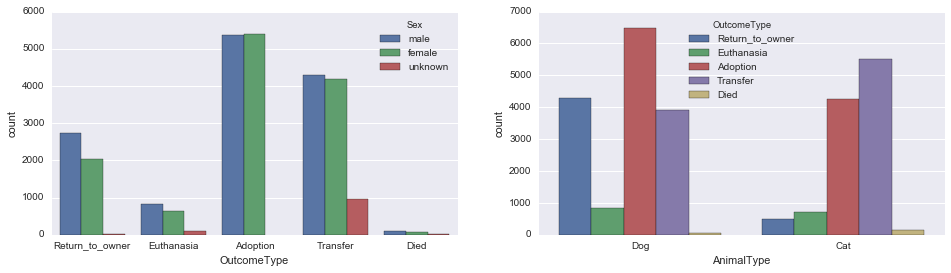

In [22]:
#see how parameters influence outcome
#there are 4 outcomes- return to owner, euthanasia, transfer, died 
#the 'ax= ' is changing which plot on left or right
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
#make two plots to compare side to side
sns.countplot(data=animals, x='OutcomeType', hue='Sex', ax=ax1)
sns.countplot(data=animals, x='AnimalType', hue='OutcomeType', ax=ax2)


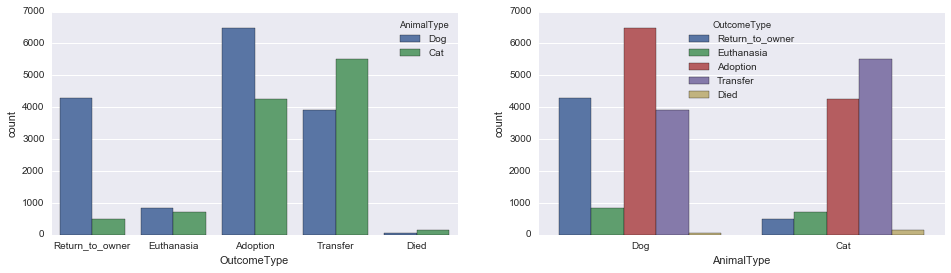

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType',hue='AnimalType', ax=ax1)
sns.countplot(data=animals, x='AnimalType',hue='OutcomeType', ax=ax2)

In [24]:
#dogs are returned to owner way more than cats
#cats are transferred more than dogs

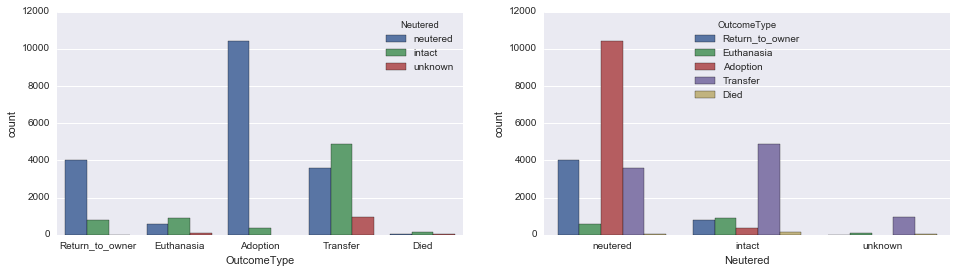

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType',hue='Neutered', ax=ax1)
sns.countplot(data=animals, x='Neutered',hue='OutcomeType', ax=ax2)

In [26]:
#Neutered animals have high chances to be adopted, while intact animals are more likely to be transferred

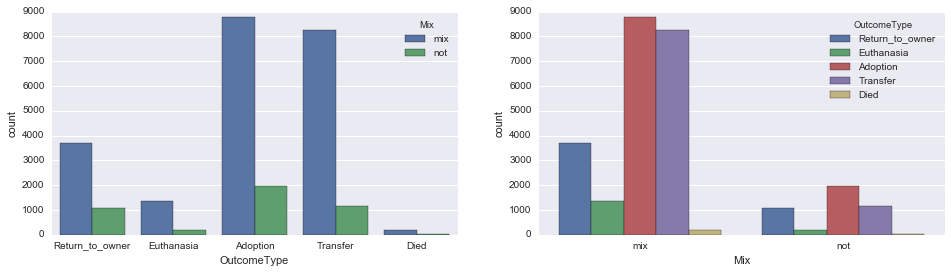

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType',hue='Mix', ax=ax1)
sns.countplot(data=animals, x='Mix',hue='OutcomeType', ax=ax2)

In [28]:
#mixed doesn't seem to have that much effect - there are much fewer purebreds

In [29]:
#what about age of the animal?
#have to def fx to get age bc in table it is listed in diff units

In [31]:
def calc_age_in_years(x):
    x=str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year')> -1: return age
    if x.find('month')> -1: return age/12.
    if x.find('week')> -1: return age/52.
    if x.find('day')> -1: return age/365.
    else: return 0
    

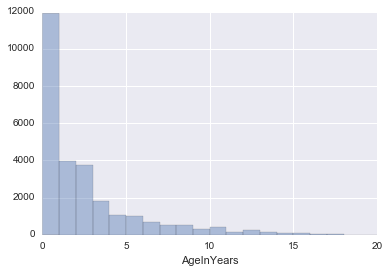

In [32]:
animals['AgeInYears'] = animals.AgeuponOutcome.apply(calc_age_in_years)
#This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions.
sns.distplot(animals.AgeInYears, bins = 20, kde=False)

In [33]:
#huge majority are 0-1 years old
#does age have effect on outcome?

In [34]:
def calc_age_category(x):
    if x < 3: return 'young'
    if x < 5: return 'young adult'
    if x < 10: return 'adult'
    return 'old'
animals['AgeCategory']=animals.AgeInYears.apply(calc_age_category)

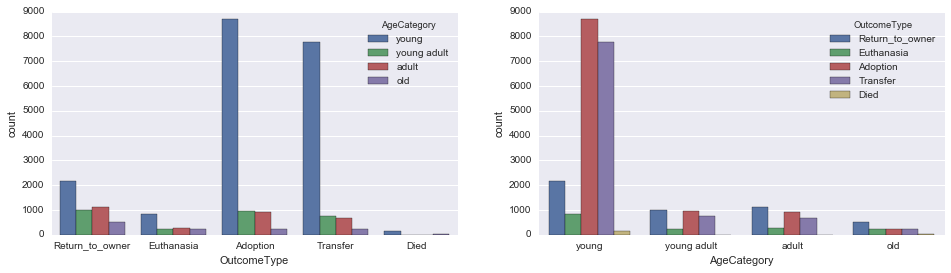

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType', hue='AgeCategory', ax=ax1)
sns.countplot(data=animals, x='AgeCategory', hue='OutcomeType', ax=ax2)

In [ ]:
#Interesting that young cats and dogs have much higher chances to be adopted or transferred than to be returned to owner or something else
#older animals with approximately equal probability can be adopted, transferred or returned.